# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# path to the source file
path = '../../../archive/2020/heart_2020_cleaned.csv'

In [17]:
#Helper Methods that will be used for the eda
def dublicate_check(df: pd.DataFrame):
    count_duplicates = df.duplicated().sum()
    print(f'The dataset has {count_duplicates} duplicates')
    df = df.drop_duplicates()
    print(f'{count_duplicates} have been removed from the dataset')
    return df

def corr_matrix(df: pd.DataFrame):
    only_numeric_df = df.select_dtypes(include='number')
    correlation_matrix = only_numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

def plot_numerical_coloumns(df: pd.DataFrame):
    numerical_cols = df.select_dtypes(include='number').columns

    if len(numerical_cols) == 0: # binary columns are categorical so leave them out
        print("No numerical columns found in the DataFrame.")
        return

    for col in numerical_cols:
        if (len(df[col].unique()) > 2): # Columns with only 2 unique numerical values should be skipped (Example Yes No has been converted to 1 and 0)
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Eine Figur mit 1 Zeile, 2 Spalten
            # Histogram und KDE im ersten Subplot
            sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[0])
            axes[0].set_title(f"Distribution of {col}")
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Frequency")
            axes[0].grid(True)

            # Boxplot im zweiten Subplot
            sns.boxplot(x=df[col], color='orange', ax=axes[1])
            axes[1].set_title(f"Boxplot for {col}")
            axes[1].set_xlabel(col)
            axes[1].grid(True)

            # Layout optimieren und anzeigen
            plt.tight_layout()
            plt.show()

def plot_valueCount_categorical(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include='object').columns

    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return
    
    num_plots = len(categorical_columns)
    num_columns = 4
    rows = math.ceil(num_plots / num_columns)

    plt.figure(figsize=(18, rows * 6))

    for i, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()
        value_counts_df = value_counts.reset_index()
        value_counts_df.columns = [col, 'Count']  # Umbenennen für Klarheit

        plt.subplot(rows, num_columns, i + 1)
        sns.barplot(
            data=value_counts_df, 
            x=col, 
            y='Count', 
            hue=col,  
            dodge=False,  
            #palette="viridis", 
            legend=False  # Keine Legende anzeigen
        )
        plt.title(f"Value Counts of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True, axis='y')
        
    plt.tight_layout()
    plt.show()

def print_categorical_col_and_values(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include='object').columns
    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return
    for col in categorical_columns:
        print(f'Column: {col}, values: {df[col].unique()}')

def convert_YesNo_to_10(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include='object').columns
    
    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return
    
    for col in categorical_columns:
        unique_values = set(df[col].dropna().unique())
        if unique_values == {'Yes', 'No'}:    
            df.loc[:,f'{col}_n'] = df[col].apply(lambda val: 0 if( val.lower() == 'no') else 1 if (val.lower() == 'yes') else  val)

    return df

def barplot_for_columns(df: pd.DataFrame, column1: str, column2: str):
    if column1 not in df.columns or column2 not in df.columns:
        print(f"Eine oder beide Spalten '{column1}' oder '{column2}' existieren nicht im DataFrame.")
        return
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column1, hue=column2, palette="viridis")
    
    plt.title(f"Bar Plot")
    plt.xlabel(column1)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title=column2)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()




In [4]:
df = pd.read_csv(path)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [6]:
df = dublicate_check(df)

The dataset has 18078 duplicates
18078 have been removed from the dataset


In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
print_categorical_col_and_values(df)

Column: HeartDisease, values: ['No' 'Yes']
Column: Smoking, values: ['Yes' 'No']
Column: AlcoholDrinking, values: ['No' 'Yes']
Column: Stroke, values: ['No' 'Yes']
Column: DiffWalking, values: ['No' 'Yes']
Column: Sex, values: ['Female' 'Male']
Column: AgeCategory, values: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Column: Race, values: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Column: Diabetic, values: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Column: PhysicalActivity, values: ['Yes' 'No']
Column: GenHealth, values: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Column: Asthma, values: ['Yes' 'No']
Column: KidneyDisease, values: ['No' 'Yes']
Column: SkinCancer, values: ['Yes' 'No']


In [9]:
df = convert_YesNo_to_10(df)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SkinCancer,HeartDisease_n,Smoking_n,AlcoholDrinking_n,Stroke_n,DiffWalking_n,PhysicalActivity_n,Asthma_n,KidneyDisease_n,SkinCancer_n
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,0,1,0,0,0,1,1,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,No,0,0,0,1,0,1,0,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,No,0,1,0,0,0,1,1,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,Yes,0,0,0,0,0,0,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,No,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,No,1,1,0,0,1,0,1,0,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,No,0,1,0,0,0,1,1,0,0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,No,0,0,0,0,0,1,0,0,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,0,0,0,0,0,0,0,0,0


In [11]:
#Define Mapping for categorical column and apply it on new column
# 1. 'AgeCategory' - aufsteigend nach Alter
AgeCategory_mapping = {
    '18-24': 18,
    '25-29': 25,
    '30-34': 20,
    '35-39': 35,
    '40-44': 40,
    '45-49': 45,
    '50-54': 50,
    '55-59': 55,
    '60-64': 60,
    '65-69': 65,
    '70-74': 70,
    '75-79': 75,
    '80 or older': 80
}
df.loc[:,'AgeCategory_n'] = df['AgeCategory'].map(AgeCategory_mapping)
# 2. 'Race' 
Race_mapping = {
    'American Indian/Alaskan Native': 0,
    'Asian': 1,
    'Black': 2,
    'Hispanic': 3,
    'Other': 4,
    'White': 5
}
df.loc[:,'Race_n'] = df['Race'].map(Race_mapping)
# 3. 'Diabetic' - aufsteigend nach Diabeteszustand
Diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes': 2,
    'Yes (during pregnancy)': 3
}
df.loc[:,'Diabetic_n'] = df['Diabetic'].map(Diabetic_mapping)
# 4. 'GenHealth' - aufsteigend nach Gesundheitseinstufung
GenHealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df.loc[:,'GenHealth_n'] = df['GenHealth'].map(GenHealth_mapping)
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Stroke_n,DiffWalking_n,PhysicalActivity_n,Asthma_n,KidneyDisease_n,SkinCancer_n,AgeCategory_n,Race_n,Diabetic_n,GenHealth_n
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,0,1,1,0,1,55,5,2,3
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,1,0,1,0,0,0,80,5,0,3
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,0,1,1,0,0,65,5,2,1
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,0,0,0,0,1,75,5,0,2
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,0,1,1,0,0,0,40,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,0,1,0,1,0,0,60,3,2,1
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,0,0,1,1,0,0,35,3,0,3
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,0,0,1,0,0,0,45,3,0,2
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,0,0,0,0,0,0,25,3,0,2


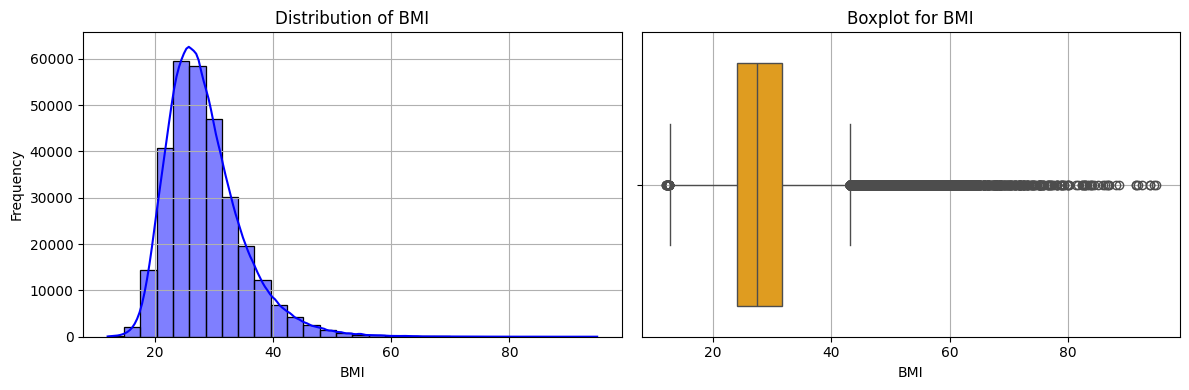

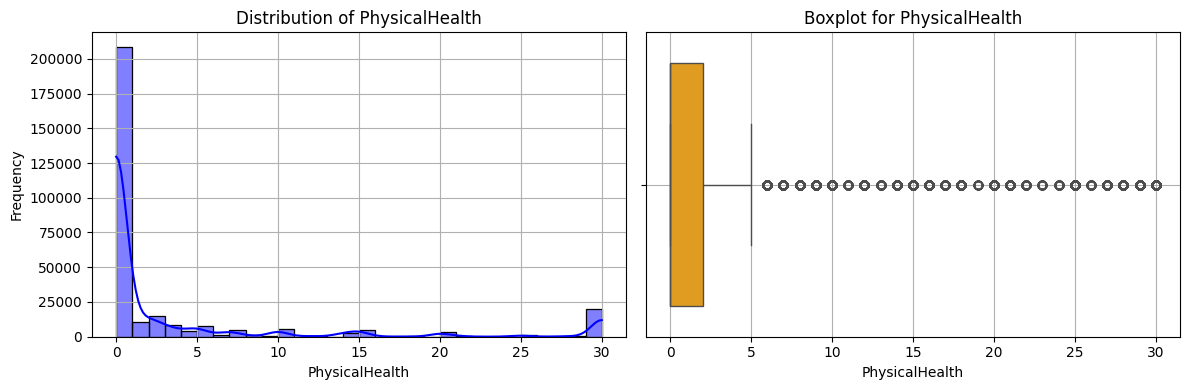

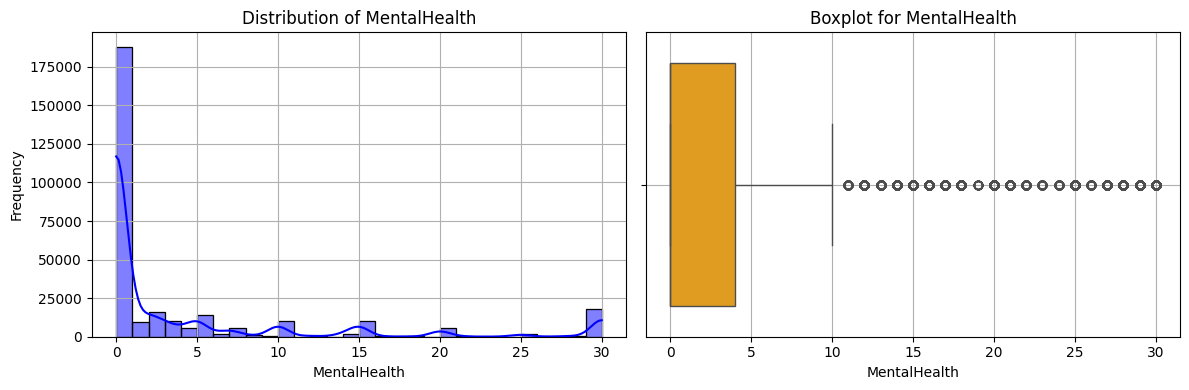

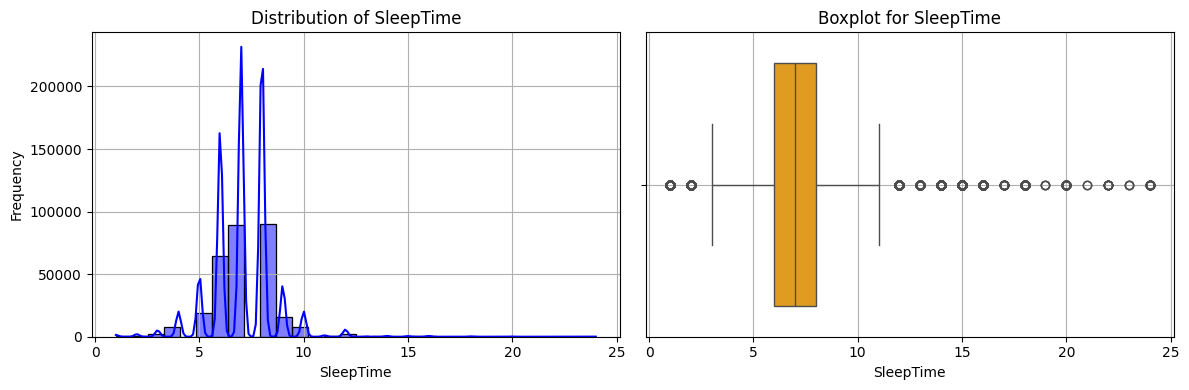

In [47]:
plot_numerical_coloumns(df)

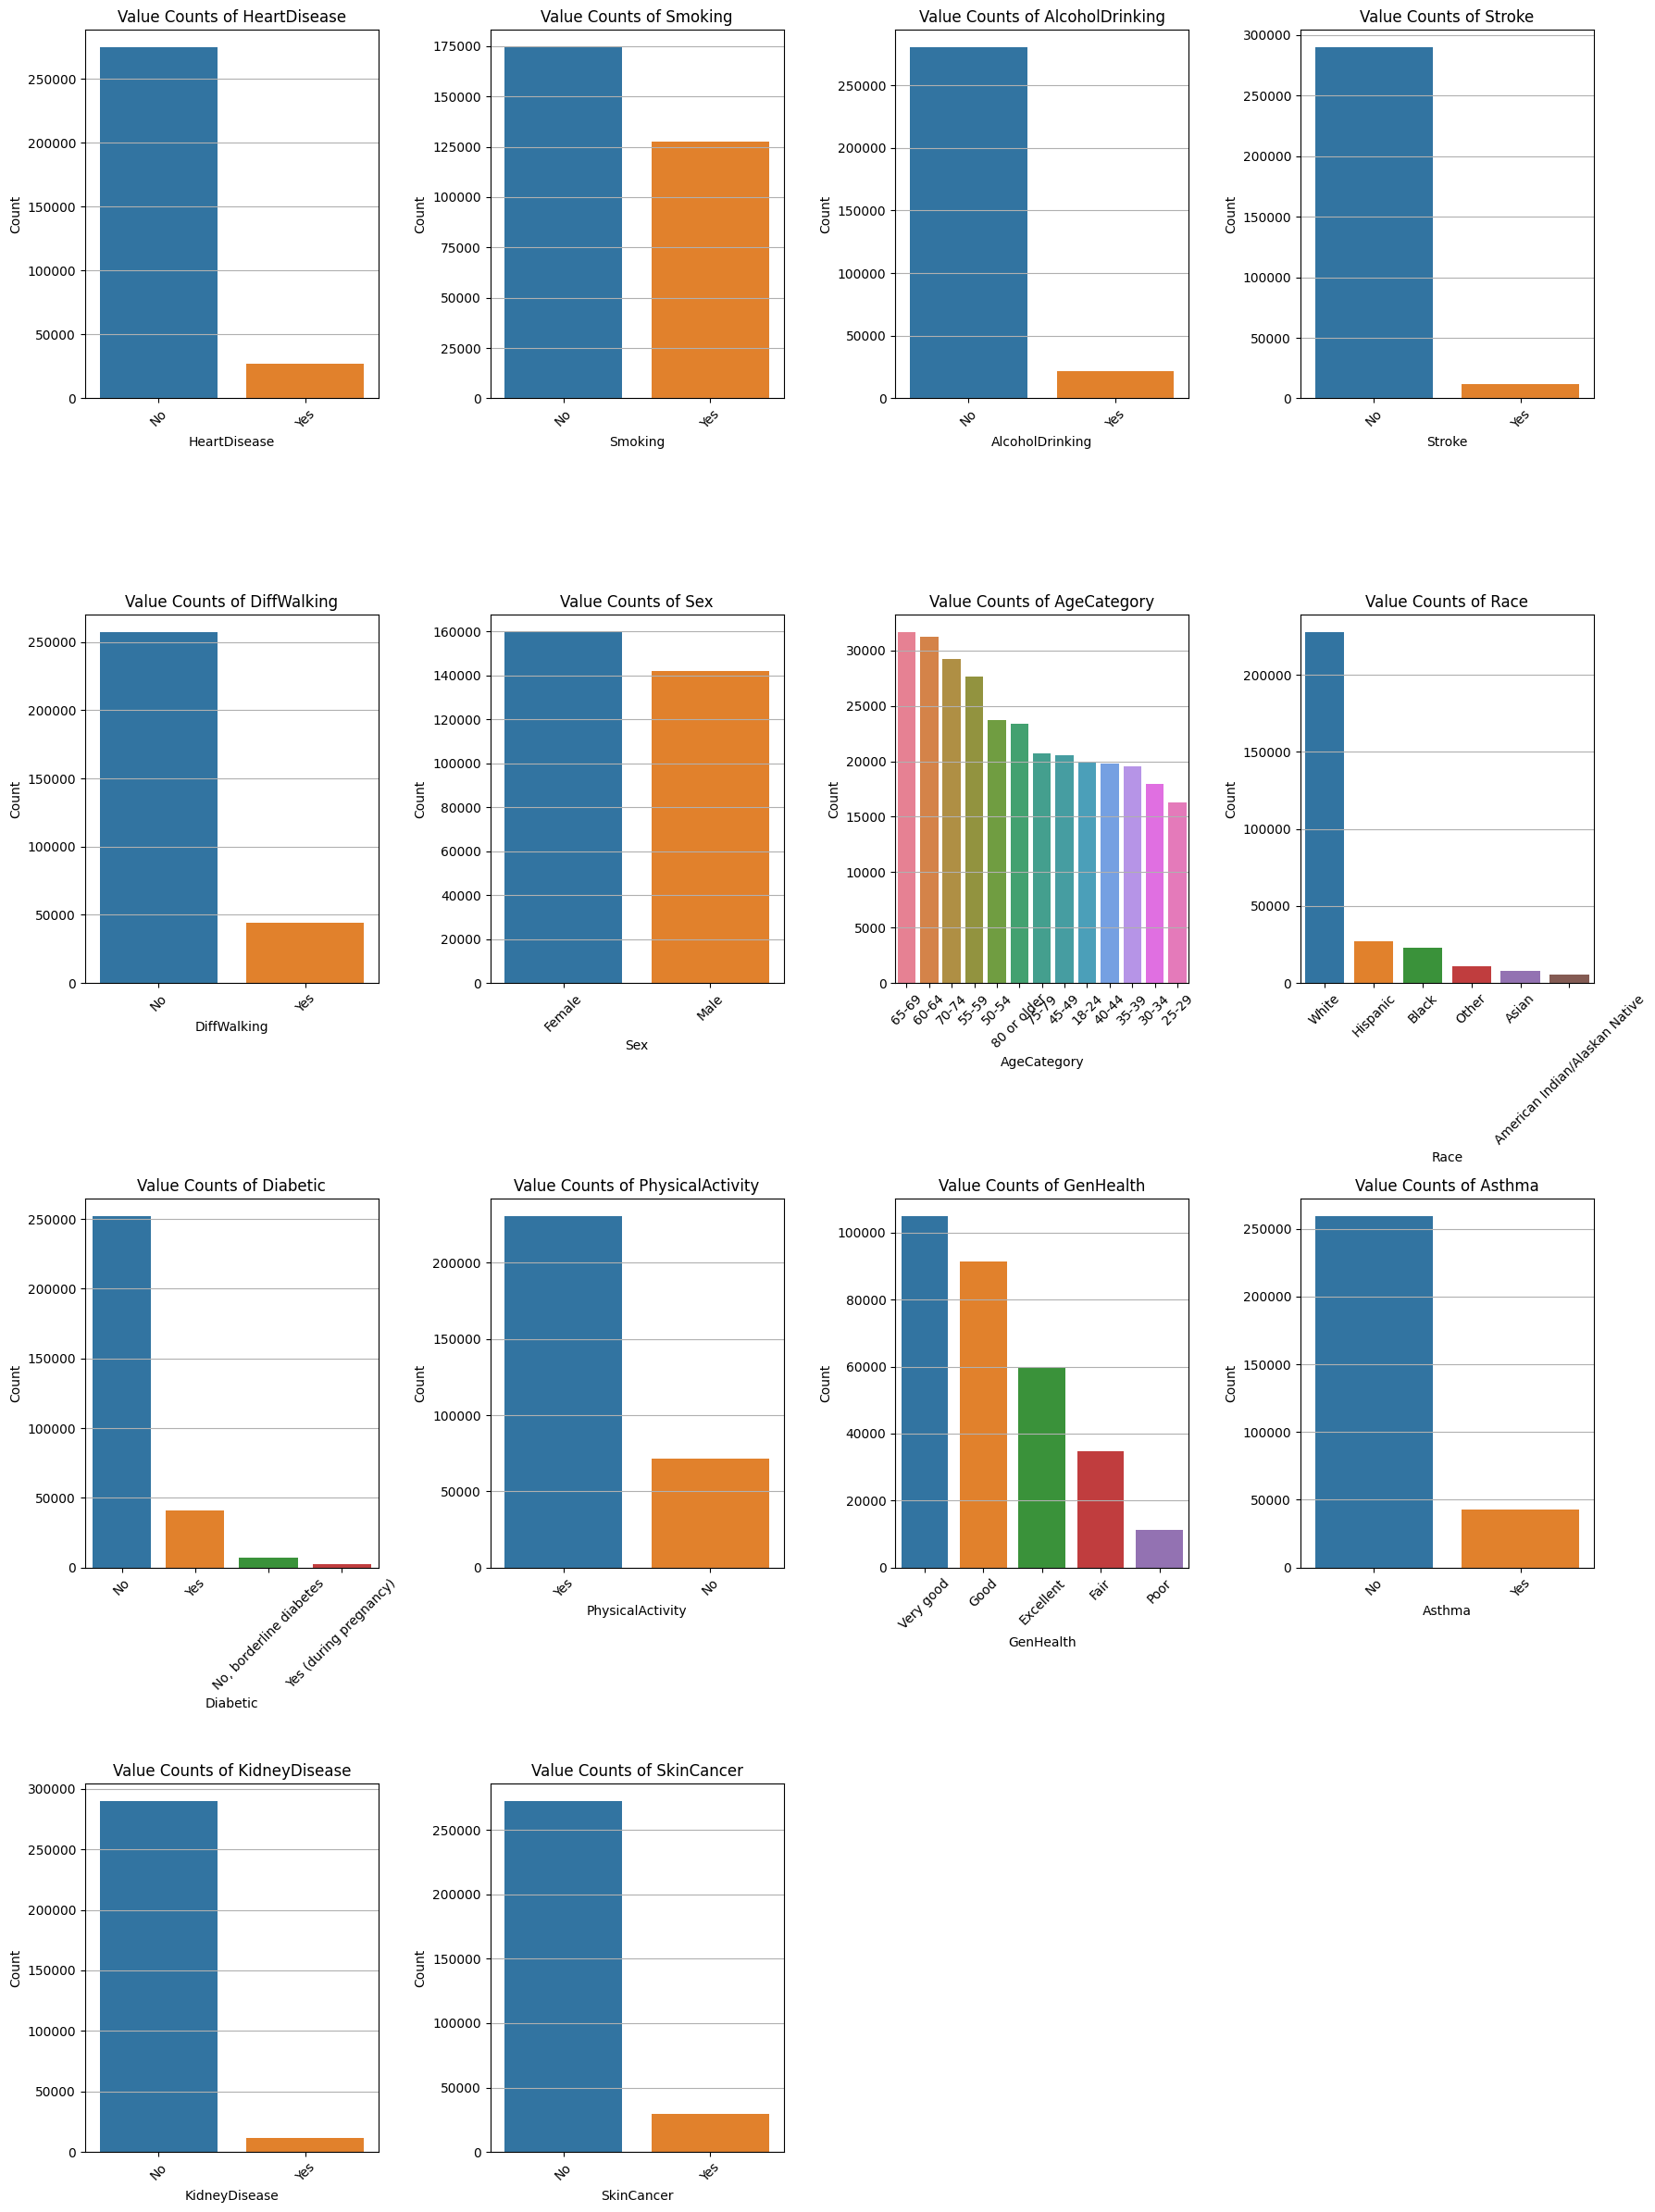

In [54]:
plot_valueCount_categorical(df)

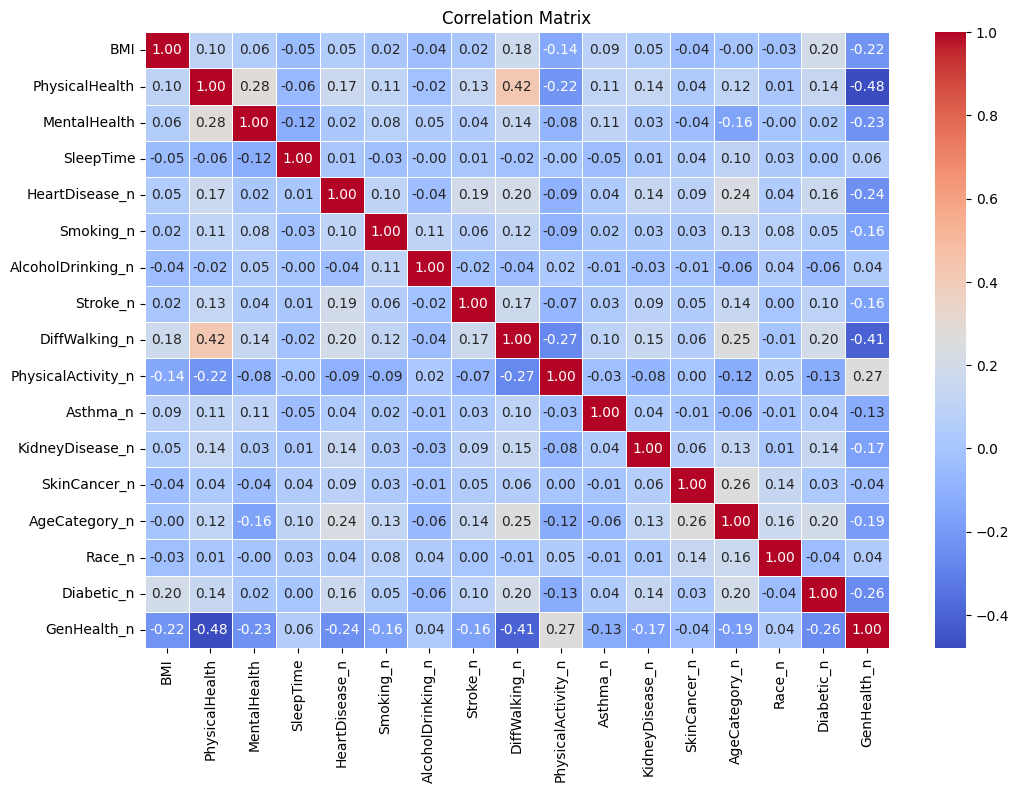

In [12]:
corr_matrix(df)

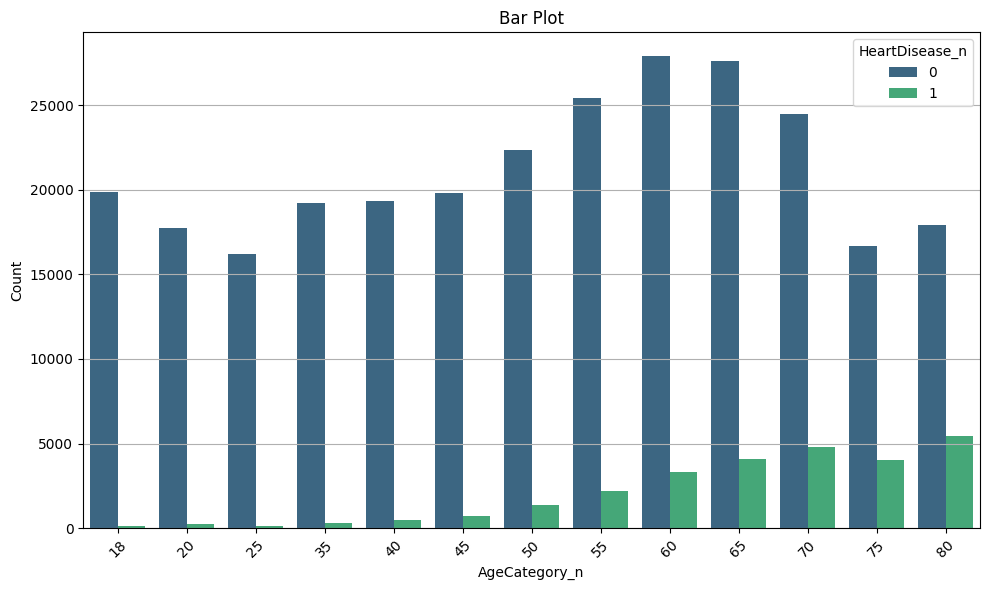

In [ ]:
barplot_for_columns(df, 'AgeCategory_n','HeartDisease_n')

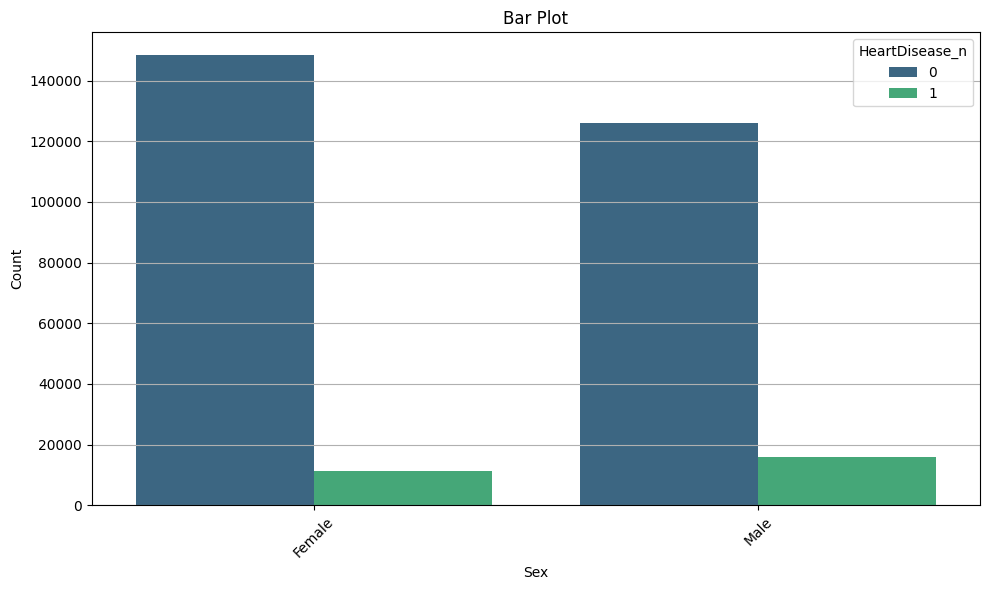

In [18]:
barplot_for_columns(df, 'Sex','HeartDisease_n')

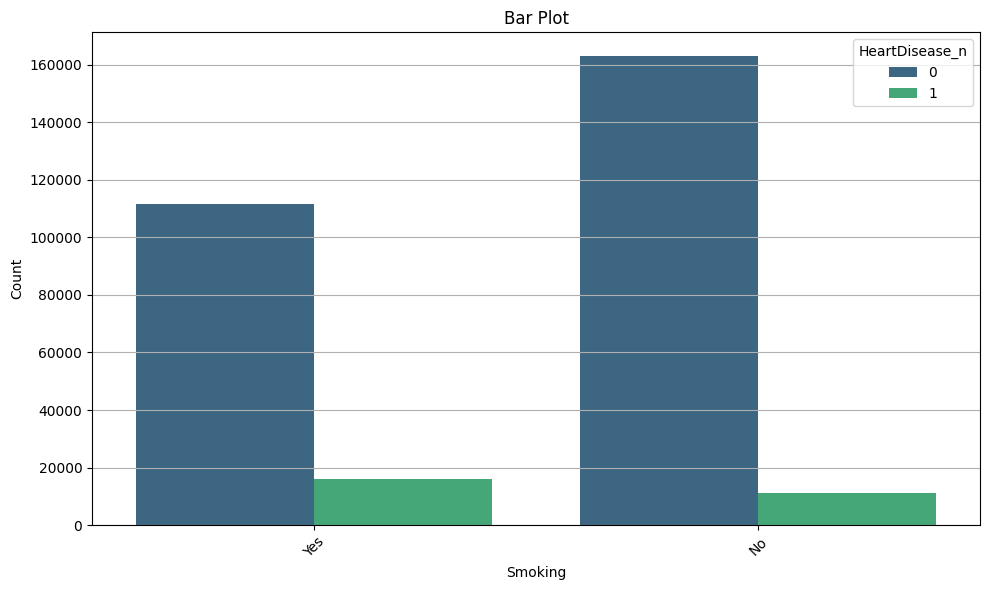

In [20]:
barplot_for_columns(df, 'Smoking','HeartDisease_n')